# Constructing a BPF function
Here we optimize the coefficients of the cosine approximation to a boxcar function, as a benchmark. (Of course, the correct answer here is the Fourier series of the boxcar)

In [232]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [256]:
w = torch.linspace(0.1,2,41) # for plotting
polynomial_target = torch.zeros(len(w))
polynomial_target = torch.zeros(len(w))
polynomial_target[int(0.25*len(w)):int(0.75*len(w))] = 1
def computeCurve(parameters):
    # polynomial_w = sum(c * w**i for i, c in enumerate(parameters))
    polynomial_w = sum(c * np.cos(i*w) for i, c in enumerate(parameters))
    return polynomial_w 
def computeError(parameters):
    polynomial_w = computeCurve(parameters)
    loss = nn.MSELoss()(polynomial_w, polynomial_target)
    return loss


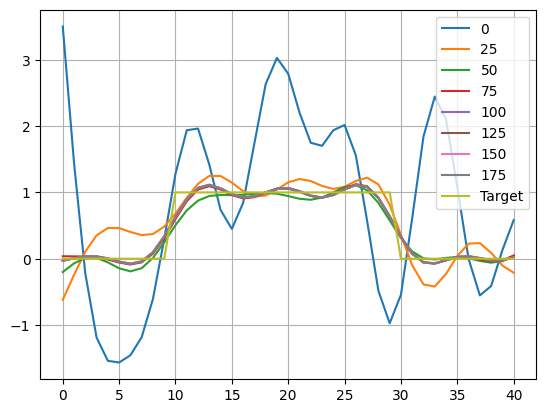

In [255]:
parameters = torch.tensor(np.random.rand(20), requires_grad=True)
fig, axes = plt.subplots(); legend = []
optimizer = torch.optim.Adam([parameters], lr=0.5) # Adaptive algorithm, better
for i in range(200):
    optimizer.zero_grad()
    f = computeError(parameters) 
    f.backward()
    optimizer.step()
    if(i%25==0):
        # print(f'Iteration {i} : (c0,c1,c2) = {[_c.item() for _c in [c0,c1,c2]]}; f = {f.item()}')
        axes.plot(computeCurve(parameters).detach().numpy())
        legend.append(i)
legend.append('Target')
axes.plot(polynomial_target)
axes.legend(legend)
axes.grid('on')

Works quite nicely!

___

# WIP

In [215]:
w = torch.linspace(0.1,2,21,requires_grad=True) # for plotting
polynomial_target = torch.zeros(len(w),requires_grad=True)
# polynomial_target[int(0.25*len(w)):int(0.75*len(w))] = 1

def computeCurve(parameters):
    # L1,C1 = parameters.detach().numpy()
    L1,C1 = parameters#.detach().numpy()
    # M = [
    #     [torch.tensor(1-(w**2)*L1*C1), torch.tensor(w*L1)],
    #     [torch.tensor(w*C1), torch.ones(len(w))]
    # ]
    # M = [
    #     [torch.tensor(1-(w**2)*L1*C1), torch.tensor(1j*w*L1)],
    #     [torch.tensor(1j*w*C1), torch.ones(len(w))]
    # ]

    # This is basically the magnitude of (A/C)
    polynomial_w = torch.tensor(1-(w**2)*L1*C1)/torch.tensor(w*C1)

    # polynomial_w = M[0][0]/M[1][0] # for tensors, indexing like M[0,0] wont work

    return polynomial_w

def computeError(parameters):
    polynomial_w = computeCurve(parameters)
    # loss = torch.sum(torch.abs(polynomial_w)**2)
    
    # loss = torch.abs(polynomial_w)**2# polynomial_target)

    loss = nn.MSELoss()(polynomial_w, polynomial_target)
    # loss = nn.MSELoss()(torch.abs(polynomial_w),torch.abs(polynomial_target))
    # print('loss')
    # print(loss)
    # loss = torch.abs(parameters)**2
    return loss

TypeError: params argument given to the optimizer should be an iterable of Tensors or dicts, but got torch.DoubleTensor

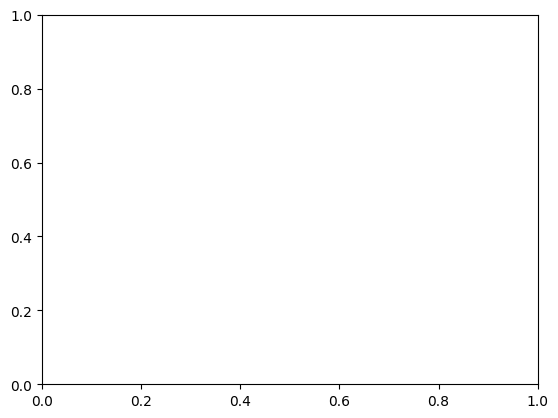

In [ ]:

# =======================================================
# parameters = torch.tensor([1.0,2.0,3.0], requires_grad=True)
parameters = torch.tensor(np.random.rand(2), requires_grad=True)

fig, axes = plt.subplots(); legend = []
# optimizer = torch.optim.Adam([parameters], lr=0.5) # Adaptive algorithm, better
optimizer = torch.optim.Adam(parameters, lr=0.5) # Adaptive algorithm, better
for i in range(100):
    optimizer.zero_grad()
    # f = computeError(c0,c1,c2) 
    f = computeError(parameters) 
    f.backward()
    optimizer.step()
    if(i%25==10):
        # print(f'Iteration {i} : (L1,C1) = {[_c.item() for _c in parameters]}; f = {f.item()}')
        # print(f'Iteration {i} : (L1,C1) = {parameters.detach().numpy()}; f = {f.item()}')
        print(f'Iteration {i} : (L1,C1) = {parameters}; f = {f.item()}')
        axes.plot(computeCurve(parameters).detach().numpy())
        legend.append(i)
# legend.append('Target')
# axes.plot(polynomial_target)
# axes.legend(legend)
# axes.grid('on')

In [230]:
import torch
import torch.optim as optim

# Create a 2D tensor (matrix)
tensor = torch.randn(3, 4, requires_grad=True)

# Create an optimizer (e.g., Adam)
optimizer = optim.Adam([tensor], lr=0.01)

# Perform optimization steps
for i in range(1000):
    # Compute loss (replace with your actual loss calculation)
    loss = torch.sum(torch.abs(tensor))

    # Update the tensor
    optimizer.zero_grad()  # Clear gradients
    loss.backward()       # Calculate gradients
    optimizer.step()       # Update tensor parameters

In [231]:
tensor

tensor([[ 0.1148,  0.2721, -0.0770,  0.2521],
        [ 0.0303, -0.3785, -0.0987, -0.1926],
        [ 0.4021, -0.1942, -0.0062, -0.2551]], requires_grad=True)